In [1]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.utils import shuffle
from plsr import PLSRComponents
from brokenaxes import brokenaxes

In [2]:
DATA_FOLDER = '../data/train_test_plsr/'

In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

In [4]:
X_train = np.load(os.path.join(DATA_FOLDER, 'X_train.npy'))
y_train = np.load(os.path.join(DATA_FOLDER, 'y_train.npy'))

X_test = np.load(os.path.join(DATA_FOLDER, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_FOLDER, 'y_test.npy'))

wn = np.load(os.path.join(DATA_FOLDER, 'wavenumbers.npy'))

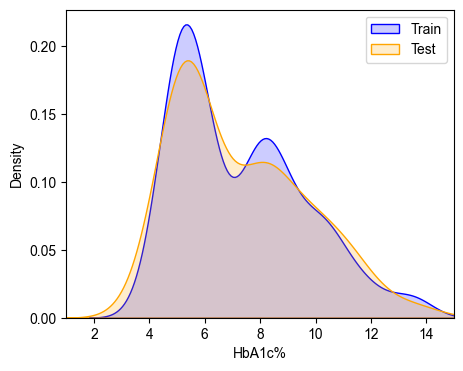

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.kdeplot(y_train, ax=ax, color='blue', fill=True, alpha=0.2, label='Train')
sns.kdeplot(y_test, ax=ax, color='orange', fill=True, alpha=0.2, label='Test')

ax.set_xlabel('HbA1c%')
ax.set_xlim([1, 15])
ax.legend()

# fig.savefig('figures/train_test.pdf', format='pdf', transparent=True)
fig.savefig('../figures/train_test.png', transparent=True, dpi=300)

In [6]:
# X_train, y_train = shuffle(X_train, y_train, random_state=20) # 15

9


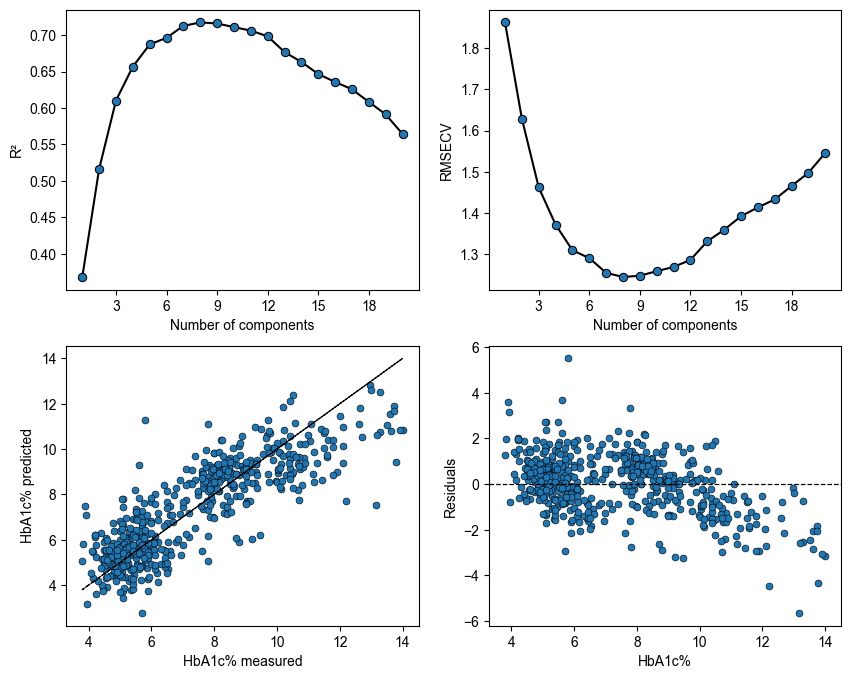

In [13]:
model = PLSRComponents()
model.fit(X_train, y_train, ncomp=20, cv=5, threshold=0)
model.plot_number_components()
print(model.num_comp)

# plt.savefig('figures/crossval_plsr.pdf', format='pdf', transparent=True)
plt.savefig('../figures/crossval_plsr.png', dpi=300, transparent=True)

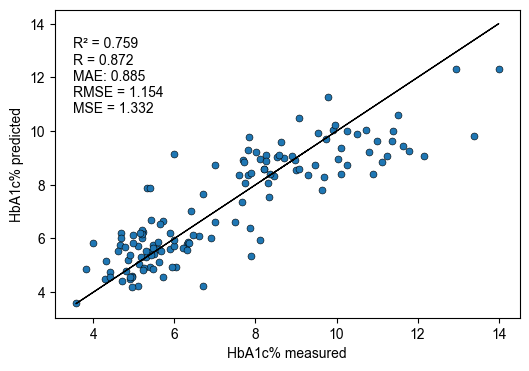

In [12]:
fig, axs = model.evaluate(X_test, y_test, params={"x": 3.5, "y": 13.5})
# fig.savefig('figures/validation_plsr.pdf', format='pdf', transparent=True)
fig.savefig('../figures/validation_plsr.png', transparent=True, dpi=300)

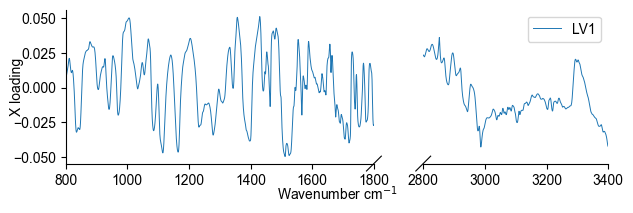

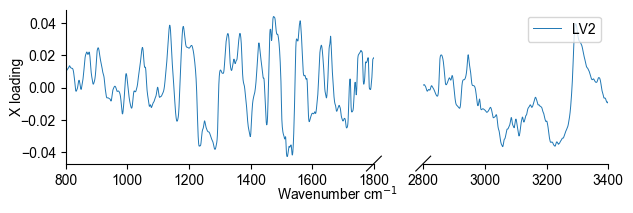

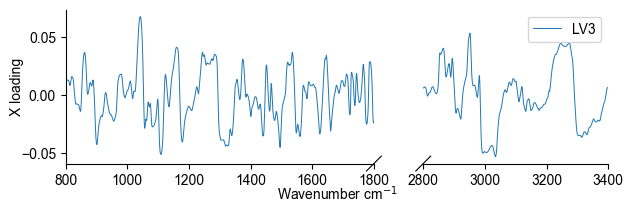

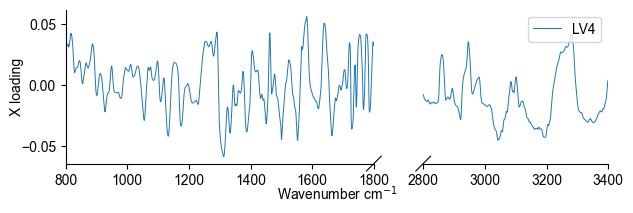

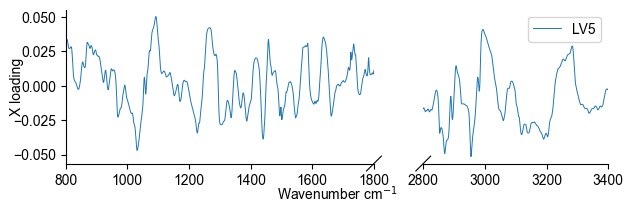

In [9]:
output_dir = '../figures/plsr_comp'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

pls = model.get_fitted_model()

for i in range(1, 6):
    fig = plt.figure(figsize=(7, 2))
    bax = brokenaxes(xlims=((800, 1800), (2800, 3400)), hspace=0.1)
    bax.plot(wn, pls.x_loadings_[:, i], label=f'LV{i}', linewidth=0.7)
    bax.set_xlabel("Wavenumber cm$^{-1}$")
    bax.set_ylabel("X loading")
    bax.legend()
    # plt.subplots_adjust(bottom=0.10)
    fig.savefig(os.path.join(output_dir, f'lv_plsr_{i}.png'), transparent=True, dpi=300)

Text(0, 0.5, 'Normalized weight')

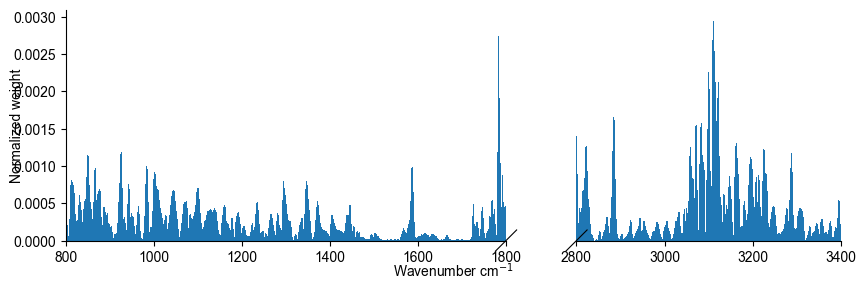

In [10]:
normalized_weight = np.abs(pls.coef_.reshape(-1)) / np.sum(np.abs(pls.coef_.reshape(-1)))

fig = plt.figure(figsize=(10, 3))
bax = brokenaxes(xlims=((800, 1800), (2800, 3400)), hspace=0.001)

bax.bar(wn, normalized_weight, width=2, label='LV1')

bax.set_xlabel("Wavenumber cm$^{-1}$")
bax.set_ylabel("Normalized weight")

In [11]:
def explained_variance(model, y_train):
    r2_sum = 0
    for comp in range(0, model.n_components):
        y_pred = np.dot(model.x_scores_[:, comp].reshape(-1, 1), model.y_loadings_[:, comp].reshape(-1, 1).T) + y_train.mean(axis=0)
        r2_sum += round(r2_score(y_train, y_pred), 3)
        print('R2 for %d component: %g' %(comp + 1,round(r2_score(y_train, y_pred), 3)))
        print(f'R2 for all {comp + 1} components: {r2_sum}')
    
explained_variance(pls, y_train)

R2 for 1 component: 0.257
R2 for all 1 components: 0.257
R2 for 2 component: 0.111
R2 for all 2 components: 0.368
R2 for 3 component: 0.061
R2 for all 3 components: 0.429
R2 for 4 component: 0.032
R2 for all 4 components: 0.46099999999999997
R2 for 5 component: 0.022
R2 for all 5 components: 0.483
R2 for 6 component: 0.01
R2 for all 6 components: 0.493
R2 for 7 component: 0.02
R2 for all 7 components: 0.513
R2 for 8 component: 0.011
R2 for all 8 components: 0.524
R2 for 9 component: 0.004
R2 for all 9 components: 0.528
